<b>Naziv projekta:</b> Rak dojke  <br>
<b>Studenti: </b> Luka Šarić i Iva Krezo <br>
 <b> O projektu: </b> Ovaj program otkriva rak dojke na temelju podataka.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%cd /content/drive/MyDrive/Colab Notebooks/UPZ
df = pd.read_csv('data.csv')
df.head()

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/UPZ


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 32)

Ukupno imamo 569 redaka podataka, što znači da je u datasetu imamo 569 pacijenata i 32 stupca što znači da imamo 33 značajke za svakog pacijenta.

Prije rada s podacima moramo provjeriti da su podaci ispravni i potpuni. Provjeravaom da je broj praznih tj. (NaN, NAN, na) vrijednosti za svaki stupac jednak 0.

In [ ]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Doznajmo broj pacijenata s malignim(M) karcinomom i benignim(B) nekancerogenim stanicama.

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='count', ylabel='diagnosis'>

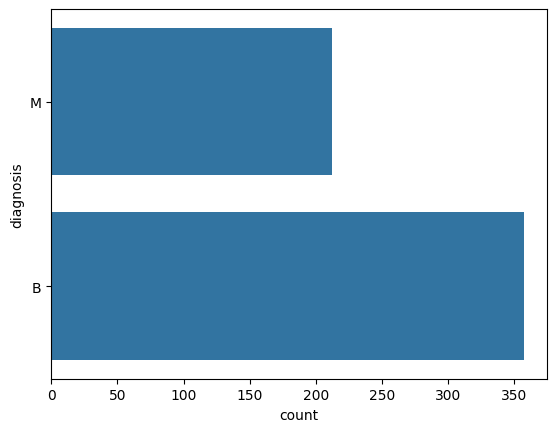

In [ ]:
#Vizualizacija broja B i M pacijenata
sns.countplot(df['diagnosis'],label="Count")

kodiramo kategoričke podatke u stupcu diagnosis M->1 a B->0, kasnije zbog upotrebe podataka će biti potrebno da budu numerički podaci


In [ ]:
#kodiramo kategoričke podatke u stupcu 'diagnosis' M->1 a B->0
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]= labelencoder_Y.fit_transform(df.iloc[:,1].values)
print(labelencoder_Y.fit_transform(df.iloc[:,1].values))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

<ipython-input-6-f3abac6022e0>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1]= labelencoder_Y.fit_transform(df.iloc[:,1].values)


U podacima ćemo ukloniti stupac id jer  nam uopće nije potreban za naše istraživanje

In [ ]:
df=df.drop(['id'], axis = 1)

## Eksplorativna analiza

#### HeatMap
Korelacija među podacima tj. stupcima; koji stupci mogu zanimljivi i na što
treba obratiti pozornost kod izrade modela, što možda označava B/M dijagnozu.

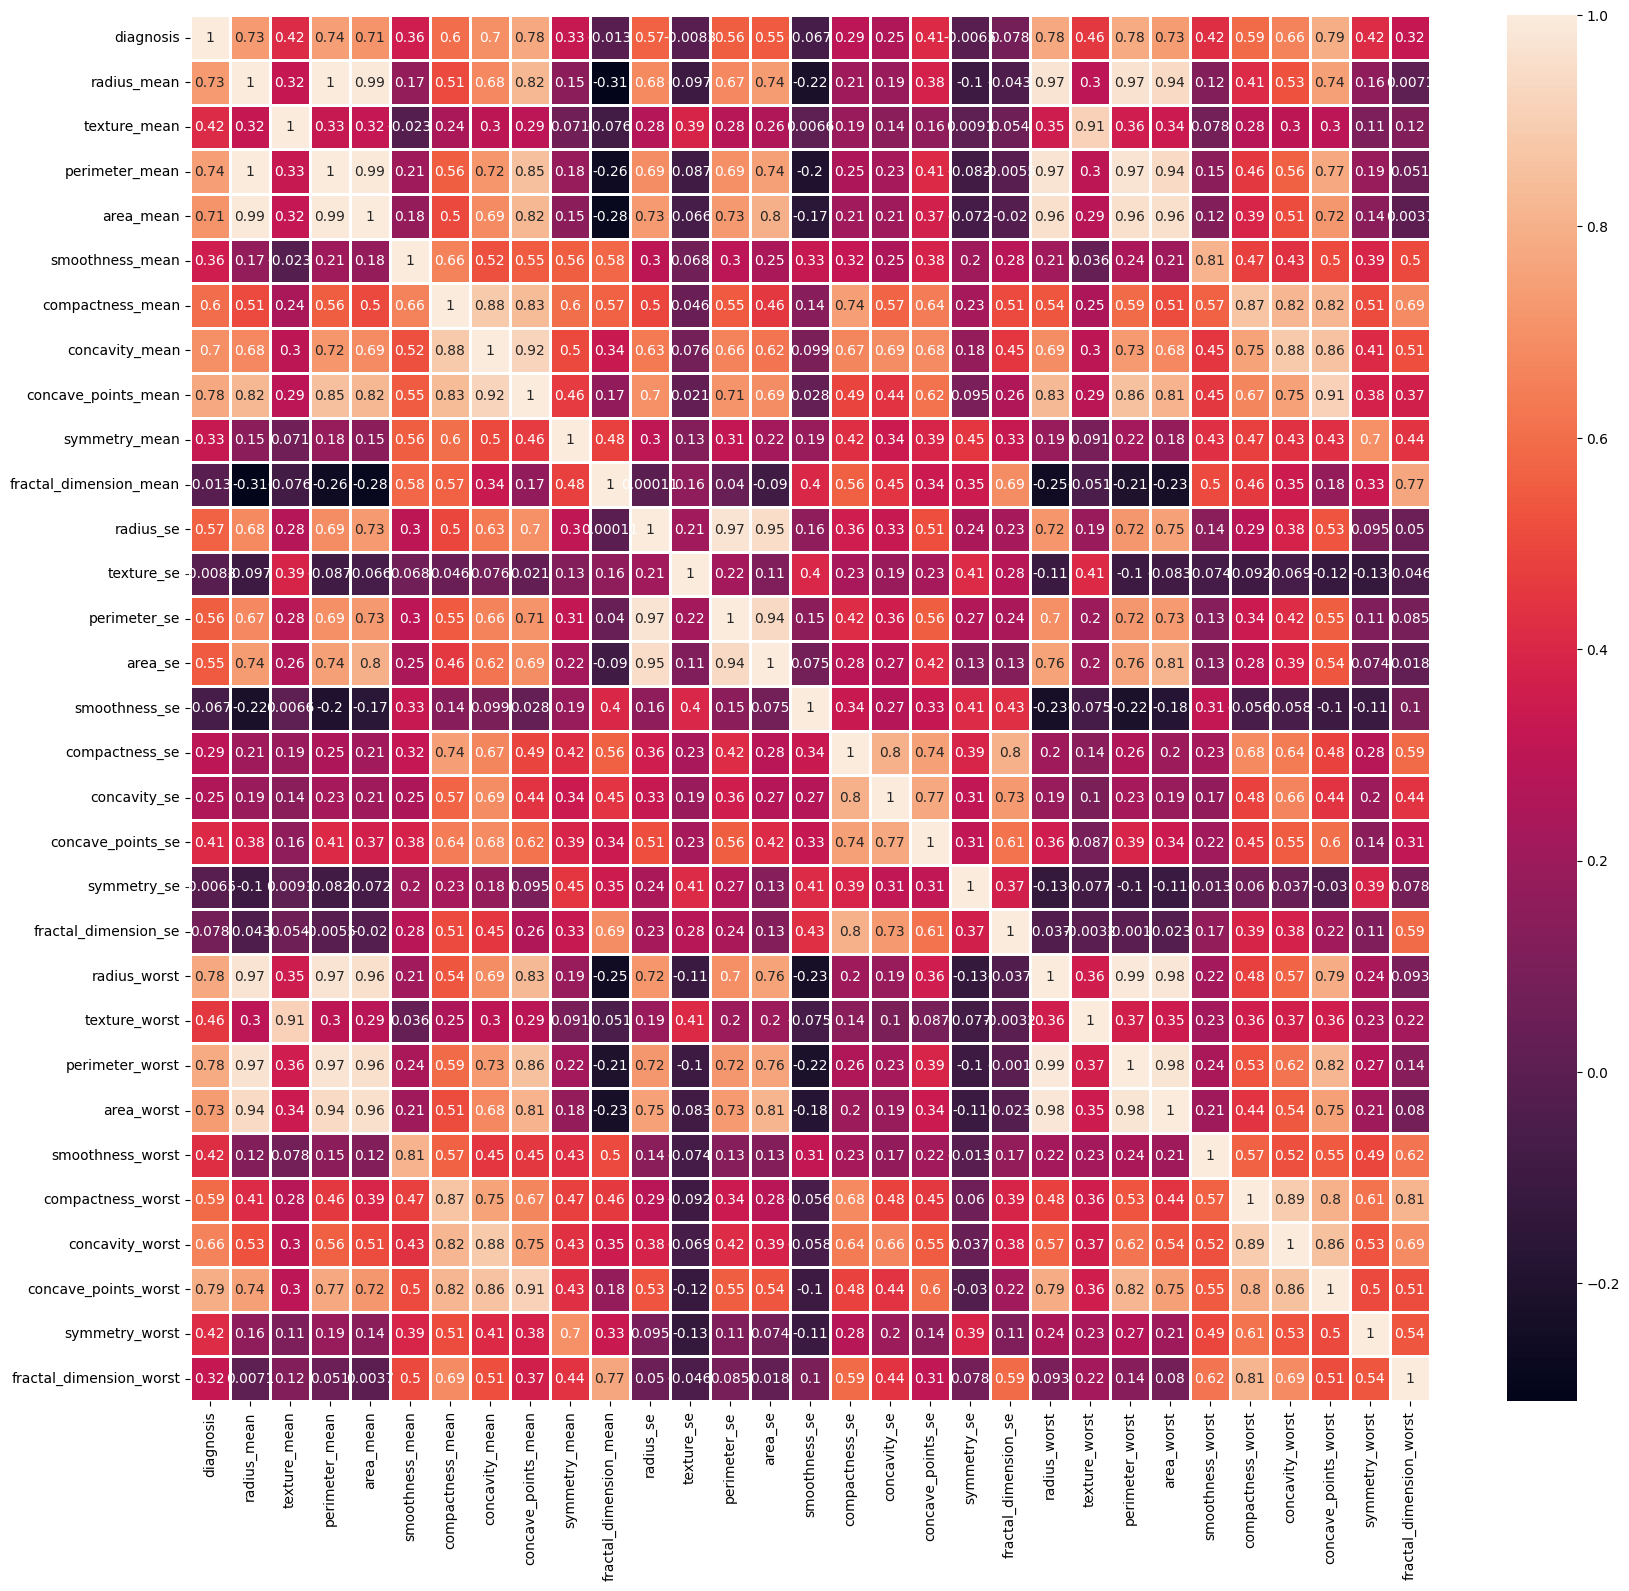

In [ ]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

Kod heatmape možemo vidjet koje značajke su povezane(visoke vrijednost), ukoliko je vrijednost negativna znači da povećanje jedne utjeće na smanjenje vrijednoti druge značajke, a ako je korelacija visoka a pozitna povećanjem jedne povećava se i druga značajka. Zato izdvajamo značajke koje su najviše povezane.

<Axes: title={'center': 'Korelacija među značajkama(corr > 0.7)'}>

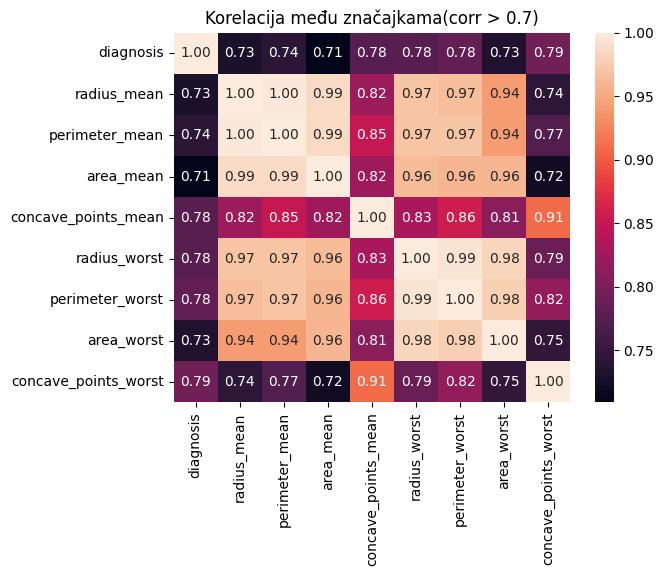

In [ ]:
granica = 0.7
filter = np.abs(df.corr()["diagnosis"]) > granica
corr_features = df.corr().columns[filter].tolist()
plt.title("Korelacija među značajkama(corr > 0.7)")
sns.heatmap(df[corr_features].corr(), annot=True, fmt=".2f")

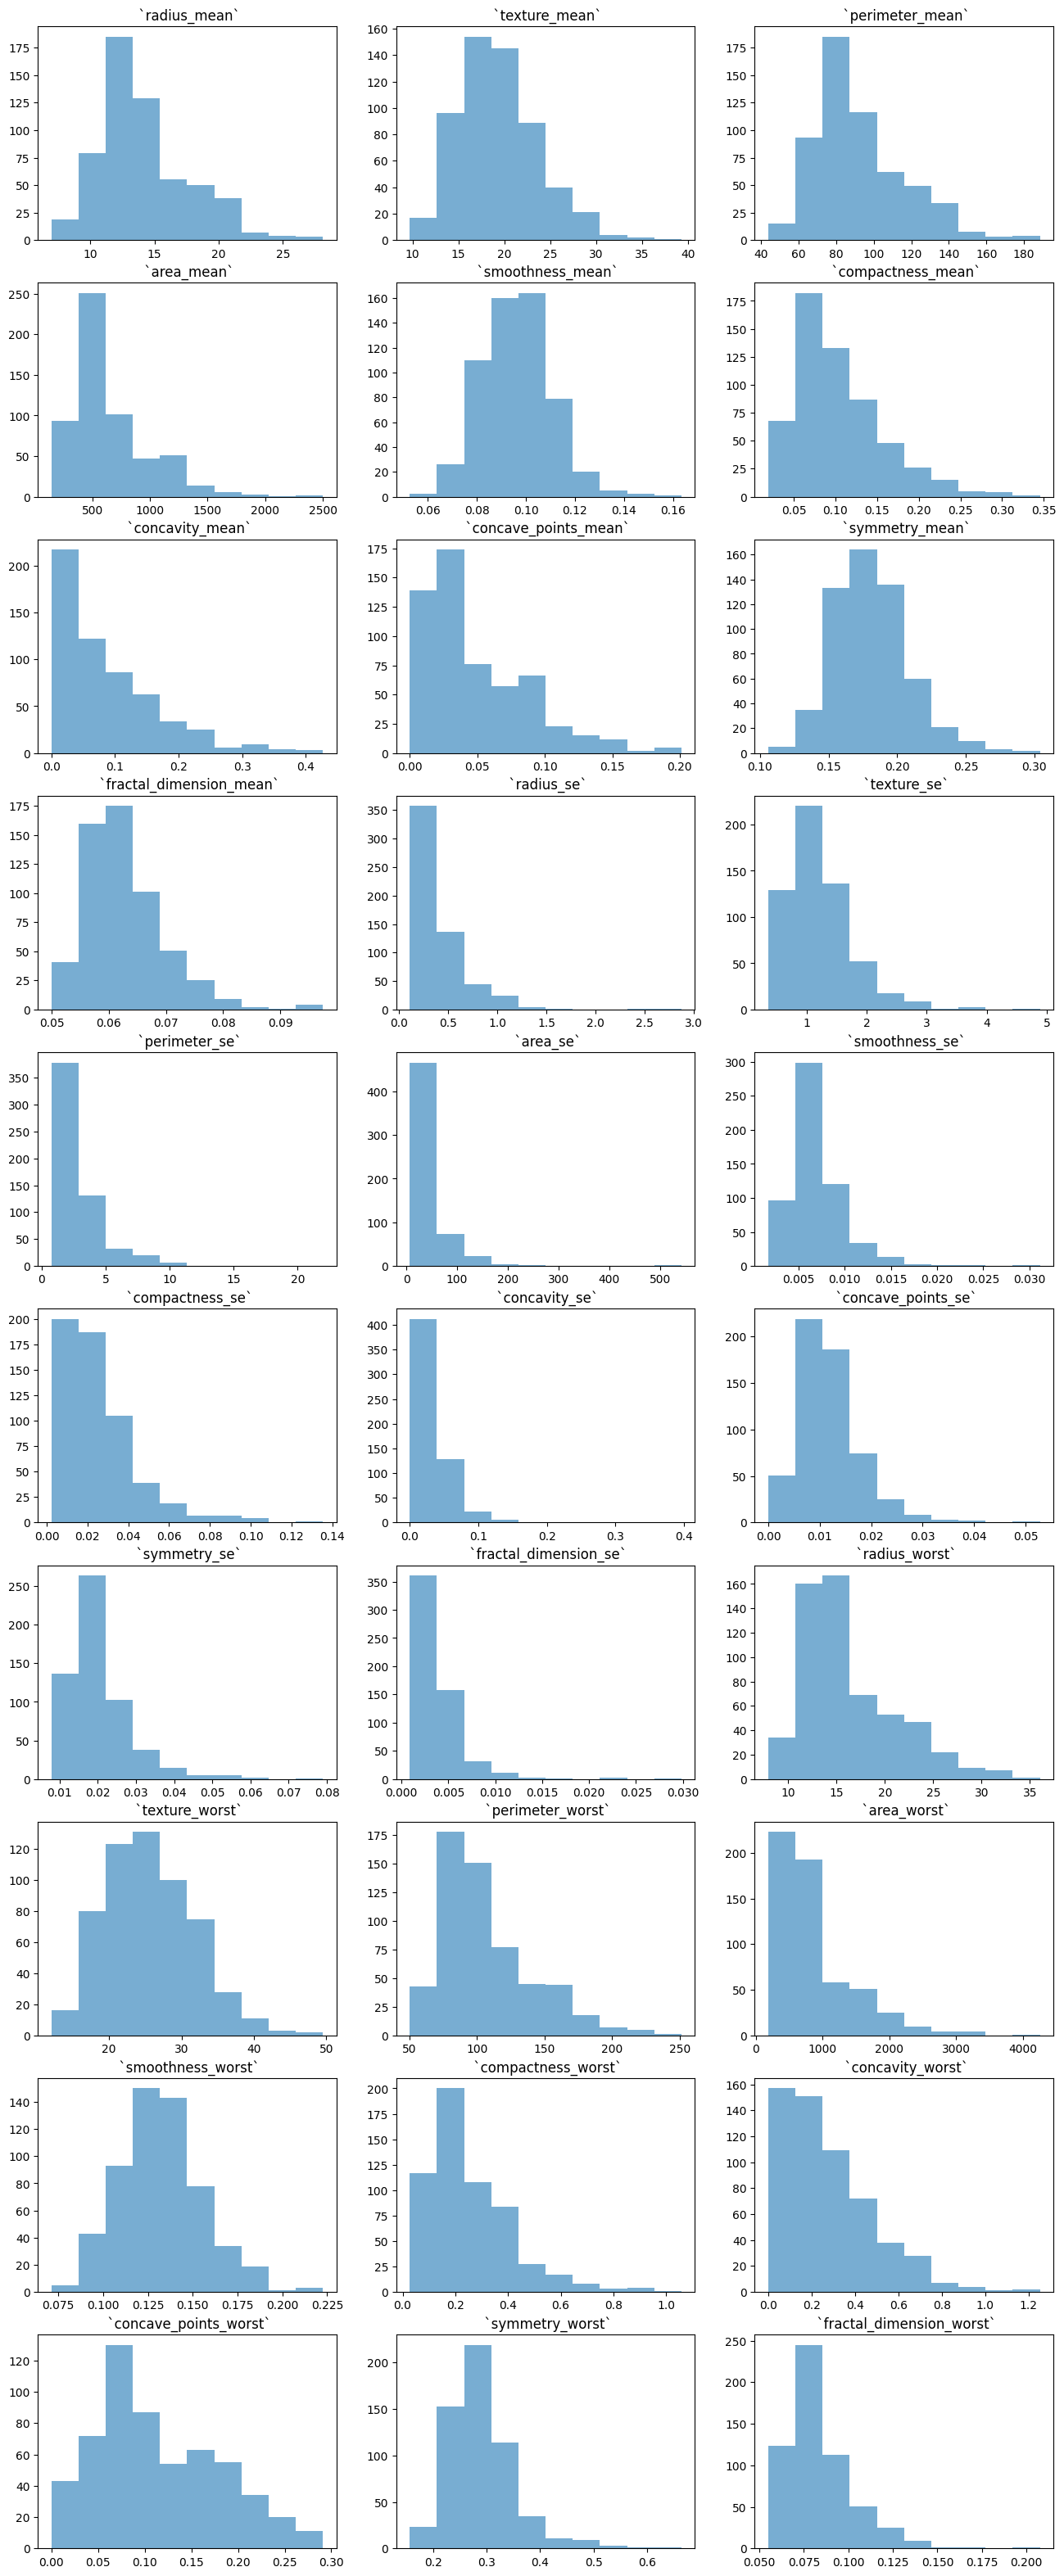

In [ ]:
#Distribucija vrijednosti značajnki na x-osi nije jednaka
import math
features = df.drop(['diagnosis'],axis=1).columns

rows = math.ceil(len(features)/3)
fig, ax = plt.subplots(rows,3,figsize=(16,40))
ax = ax.flatten()
for i,feature in enumerate(features):
    ax[i].hist(df[feature],alpha=0.6)
    ax[i].set_title(f' `{feature}`')

Nadogradnja gornjeg plota u kojem prikazujemo i razlike s obzirom na diagnozu

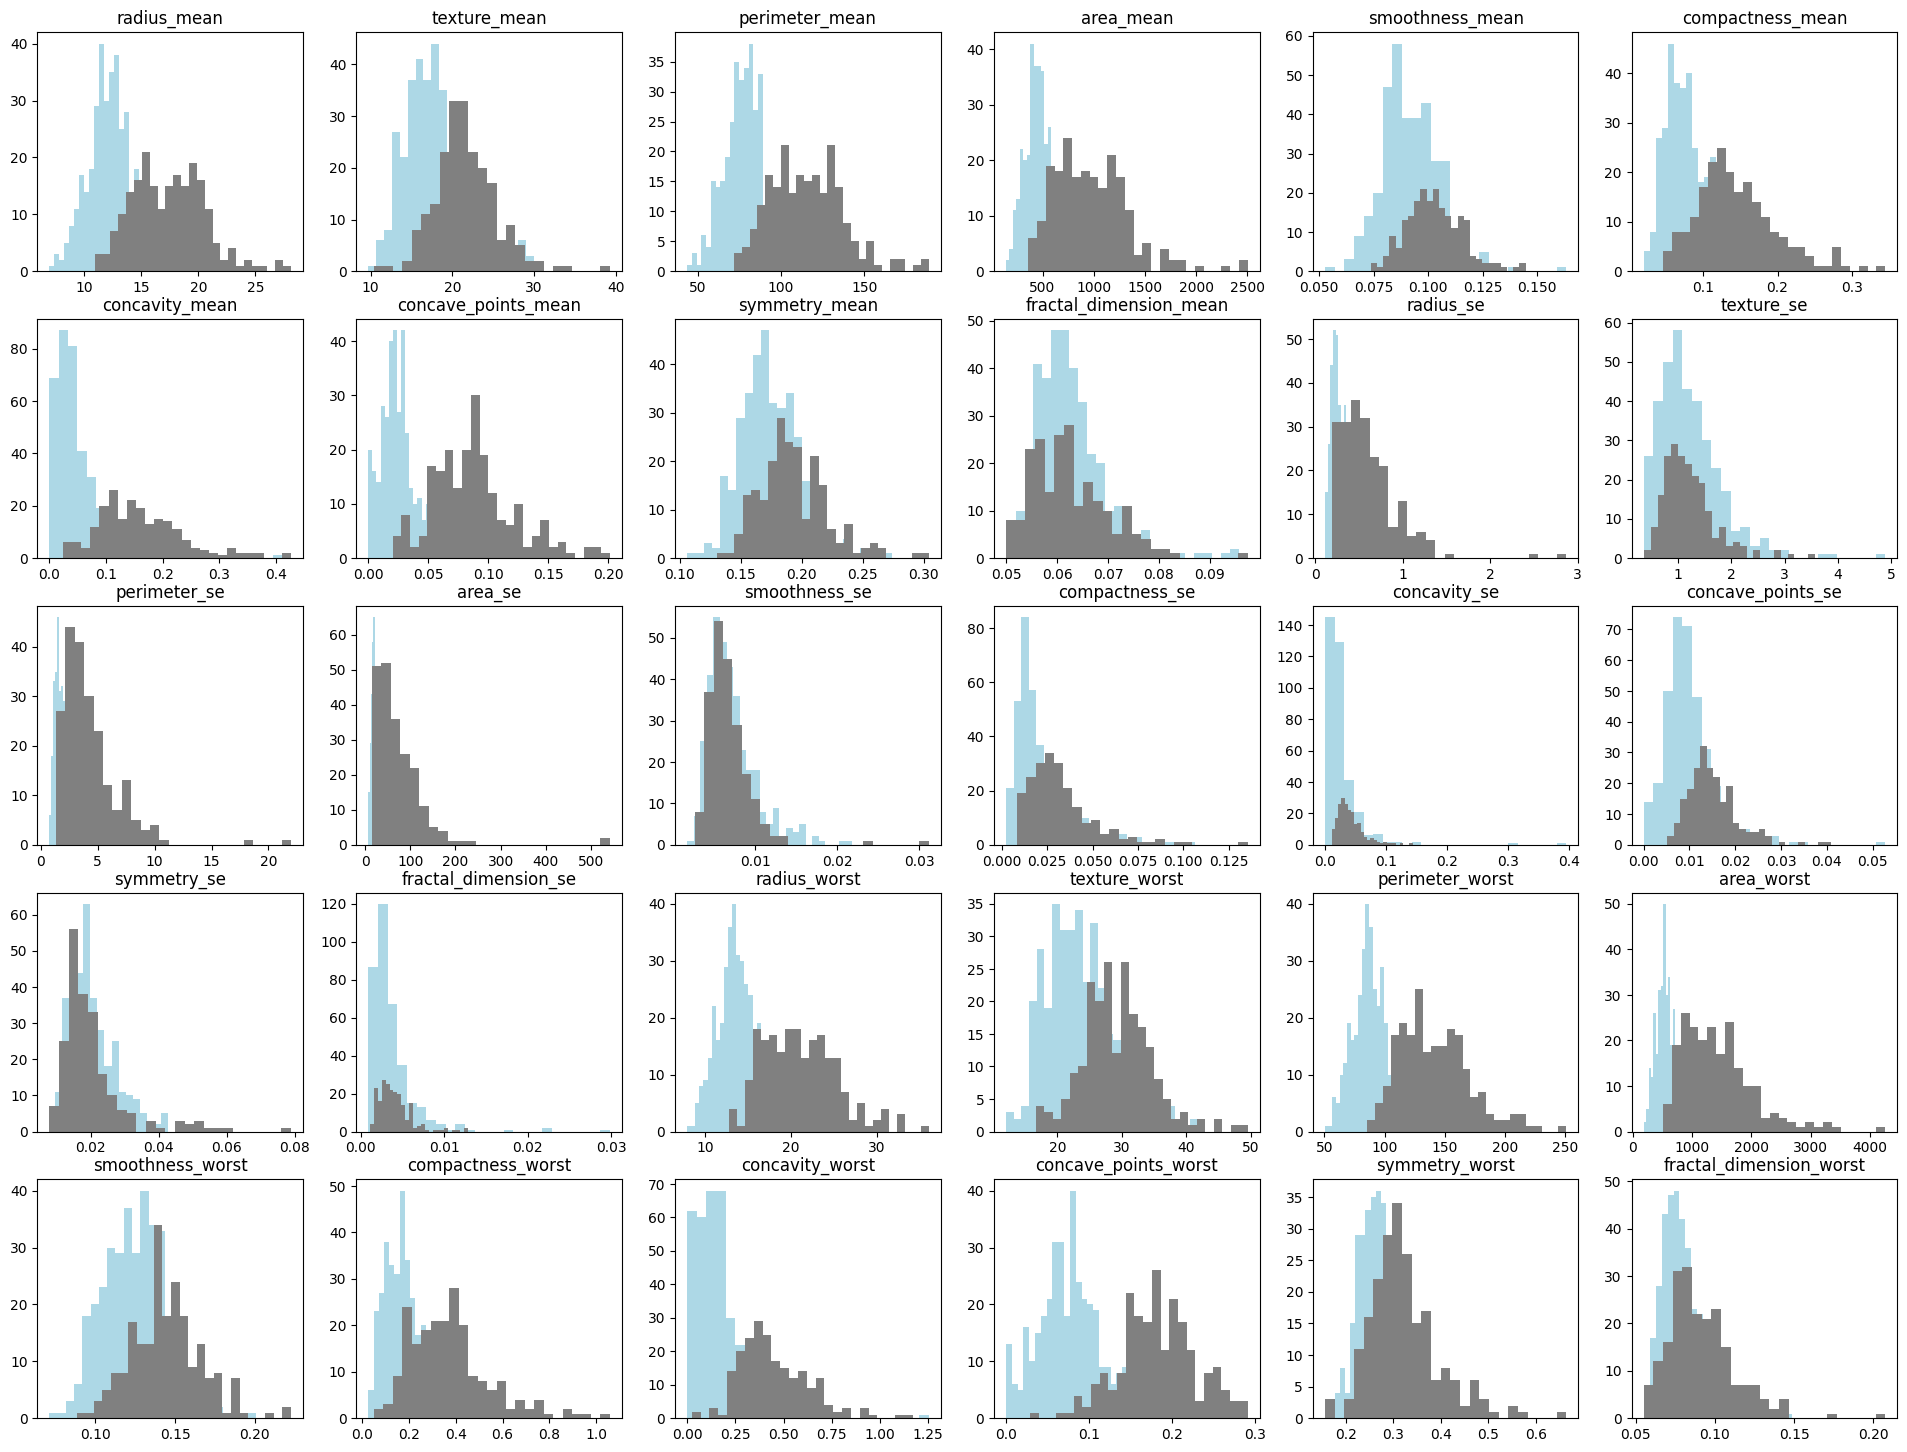

In [ ]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
fig = plt.figure(figsize=(24, 18))
for i in range(len(X.columns)):
    plt.subplot(5, 6, i+1)
    plt.title(X.columns[i])
    plt.hist(X[X.columns[i]][y==0], bins=25, color='lightblue')
    plt.hist(X[X.columns[i]][y==1], bins=25, color='grey')

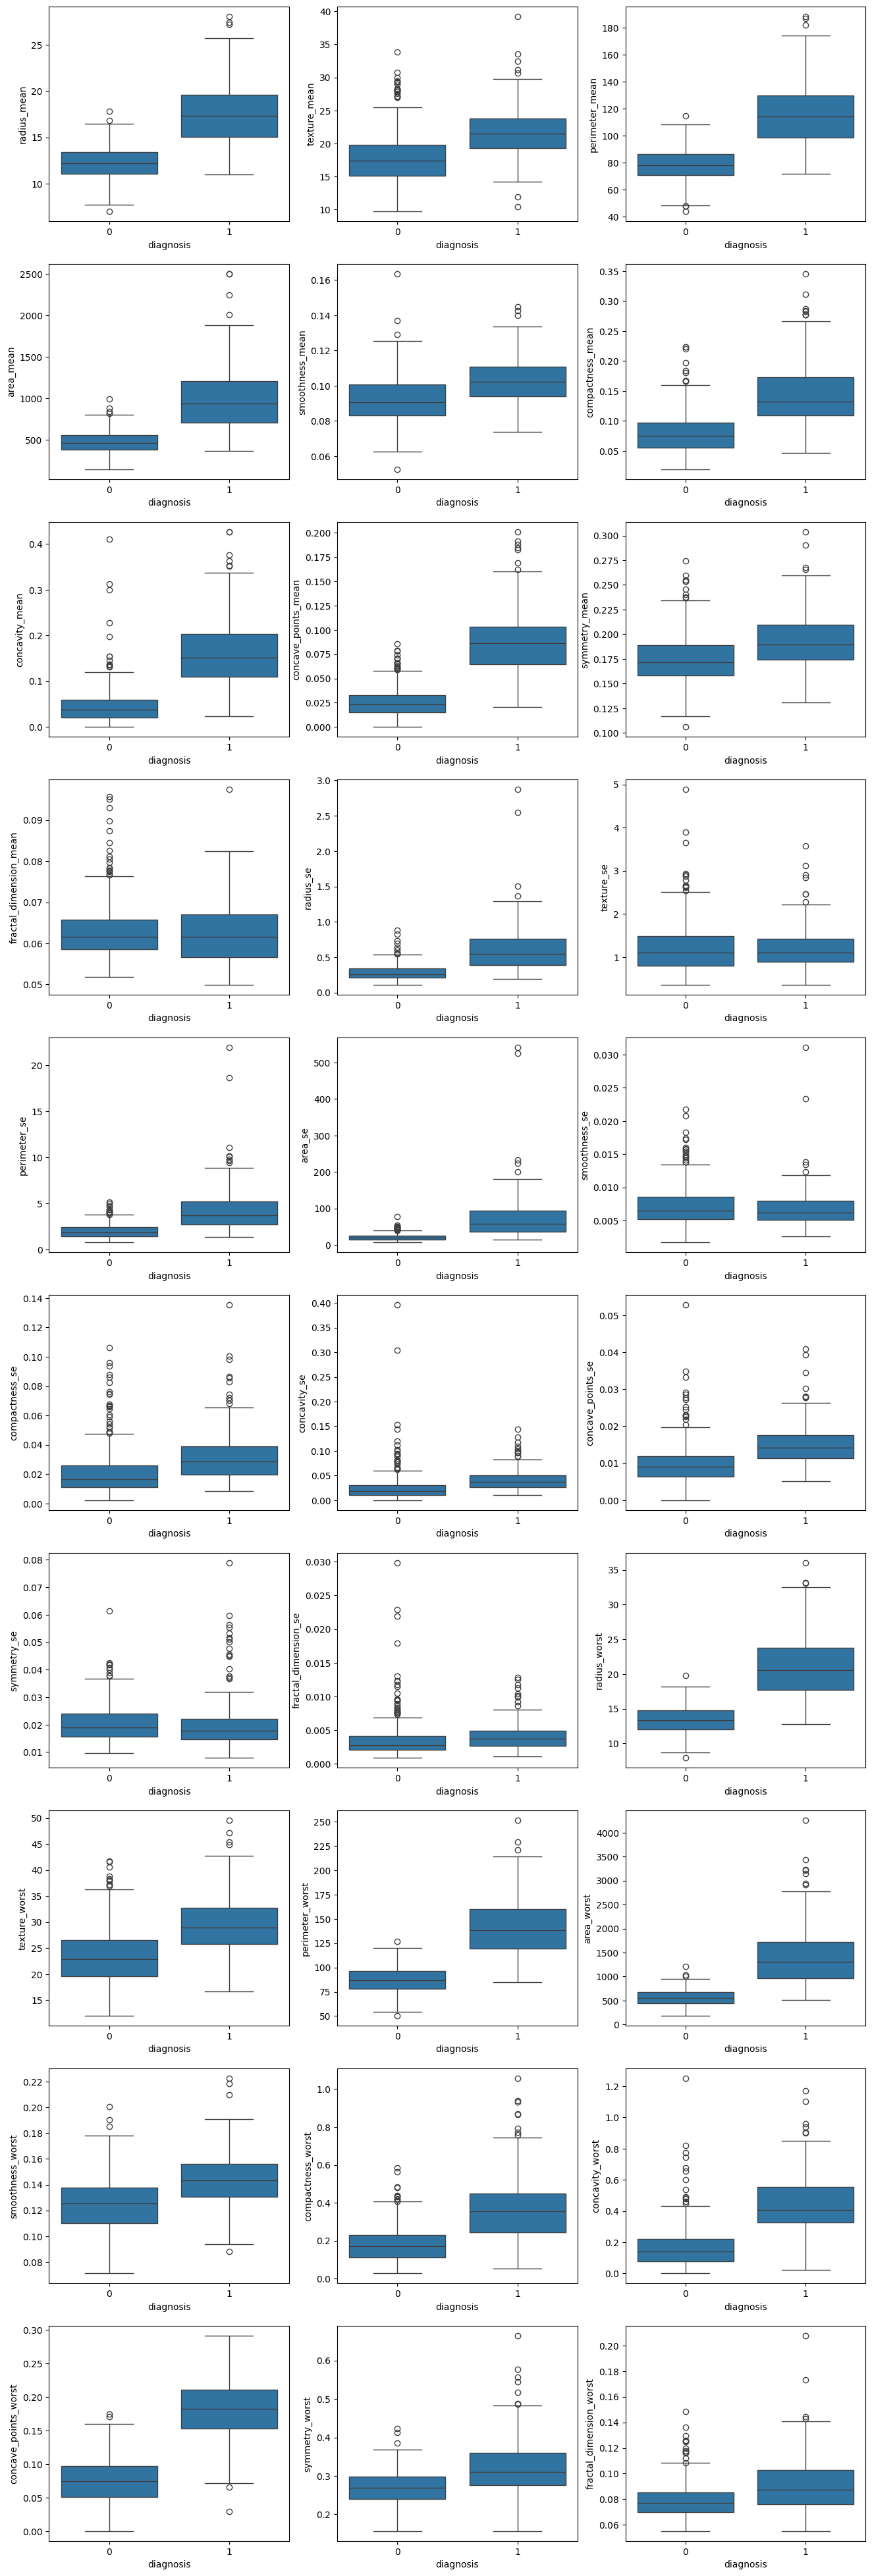

In [ ]:
import math
features = df.drop(['diagnosis'],axis=1).columns
variable = 'diagnosis'

rows = math.ceil(len(features)/3)
fig, ax = plt.subplots(rows,3,figsize=(16,50))
ax = ax.flatten()
for i,feature in enumerate(features):
    sns.boxplot(x=variable, y=feature, data=df,ax=ax[i])


Vizualno se čini da većina značajki ima vrlo pristojnu snagu predviđanja ciljane varijable.
Neke se izdvajaju (fractal_dimension_se i smootheness_se) gdje je teško vidjeti razliku vrijednosti u odnosu na dijagnozu. To znači da se ta značajke ne mjenja(puno) bez obzira na postavljenju diagnozu.

#### t-test

Za kraj ćemo koristiti nešto zvano t-test za procjenu odnosa između svake numeričke značajke i ciljne varijable. <br>
1.Radimo t-test neovisnosti (neovisnost između svake numeričke značajke i dijagnoze) <br>
2.Provjerimo postoje li neke značajke koje su prošle test neovisnosti (kažemo da je numerička značajka X prošla test neovisnosti ako ne možemo odbiti nultu hipotezu. Nula hipoteza je: Numerička značajka X i dijagnoza kategorijske varijable neovisne su). <br>
3.Razmotriti sve značajke koje nisu uspjele na testu neovisnosti (tj. Odbacuje se nulta hipoteza). <br>
Za svaki test rangirajte značajke (što je manja p-vrijednost, to je viši rang).

Cilj testa je otkriti koje značajke imaju najbolju snagu predviđanja (tj. Imaju najviši rang ili najmanju p-vrijednost)

In [ ]:
import numpy as np
from scipy import stats

def check_normal_distribution(data):
    # Izračunaj srednju vrijednost i standardnu devijaciju
    mean = np.mean(data)
    std_dev = np.std(data)

    # Izračunaj Shapiro-Wilk test normalnosti
    _, p_value = stats.shapiro(data)

    # Postavi prag značajnosti na 0.05
    alpha = 0.05

    # Provjeri je li p-vrijednost manja od praga značajnosti
    if p_value > alpha:
        print("Podaci su normalno distribuirani")
    else:
        print("Podaci nisu normalno distribuirani")


In [ ]:
from scipy.stats import ttest_ind
features = df.drop(['diagnosis'],axis=1).columns

label = 'diagnosis'
dic = {'Categorical': [],
    'Znacajka': [],
    'p-value': [],
    'p < 0.05': [],
    't-statistic': []}


assert df[label].unique().size == 2, 'Svaka značajka se može pojaviti samo jednom!'

for feature in features:
    value_1 = df[label].unique()[0]
    value_2 = df[label].unique()[1]

    a = df[df[label] == value_1][feature].values
    b = df[df[label] == value_2][feature].values

    statistic, pval = ttest_ind(a,b)
    dic['Categorical'].append(label)
    dic['Znacajka'].append(feature)
    dic['p-value'].append(pval)
    dic['p < 0.05'].append(pval<0.05)
    dic['t-statistic'].append(statistic)


ttest_df = pd.DataFrame(dic)
ttest_df

,Categorical,Znacajka,p-value,p < 0.05,t-statistic
0,diagnosis,radius_mean,8.465941e-96,True,25.435822
1,diagnosis,texture_mean,4.058636e-25,True,10.867201
2,diagnosis,perimeter_mean,8.436251e-101,True,26.405213
3,diagnosis,area_mean,4.734564e-88,True,23.938687
4,diagnosis,smoothness_mean,1.051850e-18,True,9.146099
5,diagnosis,compactness_mean,3.938263e-56,True,17.698392
6,diagnosis,concavity_mean,9.966556e-84,True,23.103963
7,diagnosis,concave_points_mean,7.101150e-116,True,29.354319
8,diagnosis,symmetry_mean,5.733384e-16,True,8.338312
9,diagnosis,fractal_dimension_mean,7.599368e-01,False,-0.305711


Sada provjerimo koliko ih je prošlo t-test

In [ ]:
ttest_df['p < 0.05'].value_counts()

True     25
False     5
Name: p < 0.05, dtype: int64

In [ ]:
print("Značajke koje su prošle t-test:")
print([x for x in ttest_df[ttest_df['p < 0.05'] == False]['Znacajka'].values])

Značajke koje su prošle t-test:
['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se']


Vizualizacija značajki koje nisu prošle t-test

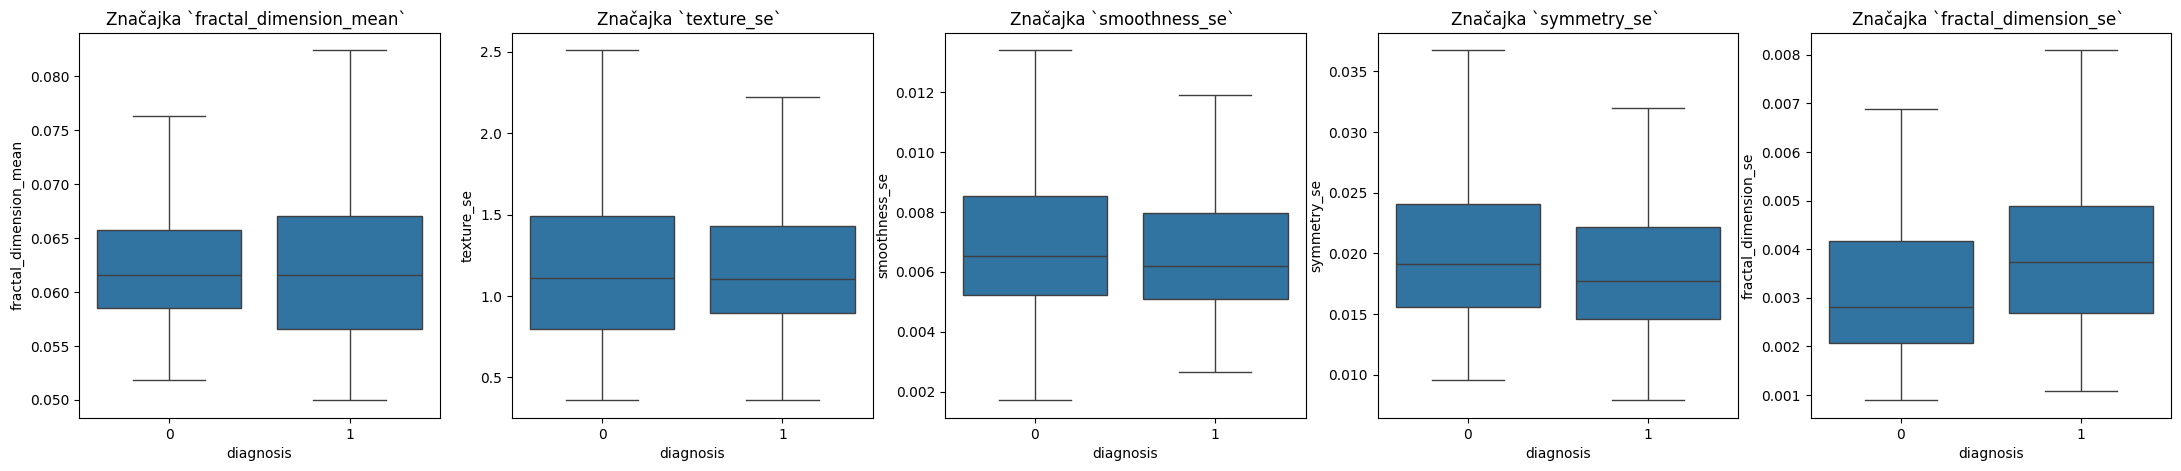

In [ ]:
features = ttest_df[ttest_df['p < 0.05'] == False]['Znacajka'].values
variable = 'diagnosis'

rows = math.ceil(len(features)/3)
fig, ax = plt.subplots(1,5,figsize=(27,5))
ax = ax.flatten()
for i,feature in enumerate(features):
    sns.boxplot(x=variable, y=feature, data=df,ax=ax[i],showfliers=False)
    ax[i].set_title(f'Značajka `{feature}` ')

Kao što je na samom početku eksplorative analize viđeno, možemo vidjeti da su vrijednosti raspodjele za ove numeričke značajke vrlo slične.

Sada prelazimo na značajke neuspjelog testa neovisnosti (tj. vrijednost p je manja od 0,05). Svaku ćemo značajku rangirati prema njenoj p-vrijednosti: što je manja p-vrijednost, to je viši rang.

In [ ]:
ttest_df = ttest_df.sort_values(by='p-value',ascending=True).reset_index().reset_index().drop('index',axis=1)
ttest_df.rename(columns={'level_0':'Rang'},inplace=True)
ttest_df['Rang'] += 1
ttest_df

,Rang,Categorical,Znacajka,p-value,p < 0.05,t-statistic
0,1,diagnosis,concave_points_worst,1.969100e-124,True,31.054555
1,2,diagnosis,perimeter_worst,5.771397e-119,True,29.965717
2,3,diagnosis,concave_points_mean,7.101150e-116,True,29.354319
3,4,diagnosis,radius_worst,8.482292e-116,True,29.339082
4,5,diagnosis,perimeter_mean,8.436251e-101,True,26.405213
5,6,diagnosis,area_worst,2.828848e-97,True,25.721590
6,7,diagnosis,radius_mean,8.465941e-96,True,25.435822
7,8,diagnosis,area_mean,4.734564e-88,True,23.938687
8,9,diagnosis,concavity_mean,9.966556e-84,True,23.103963
9,10,diagnosis,concavity_worst,2.464664e-72,True,20.897175


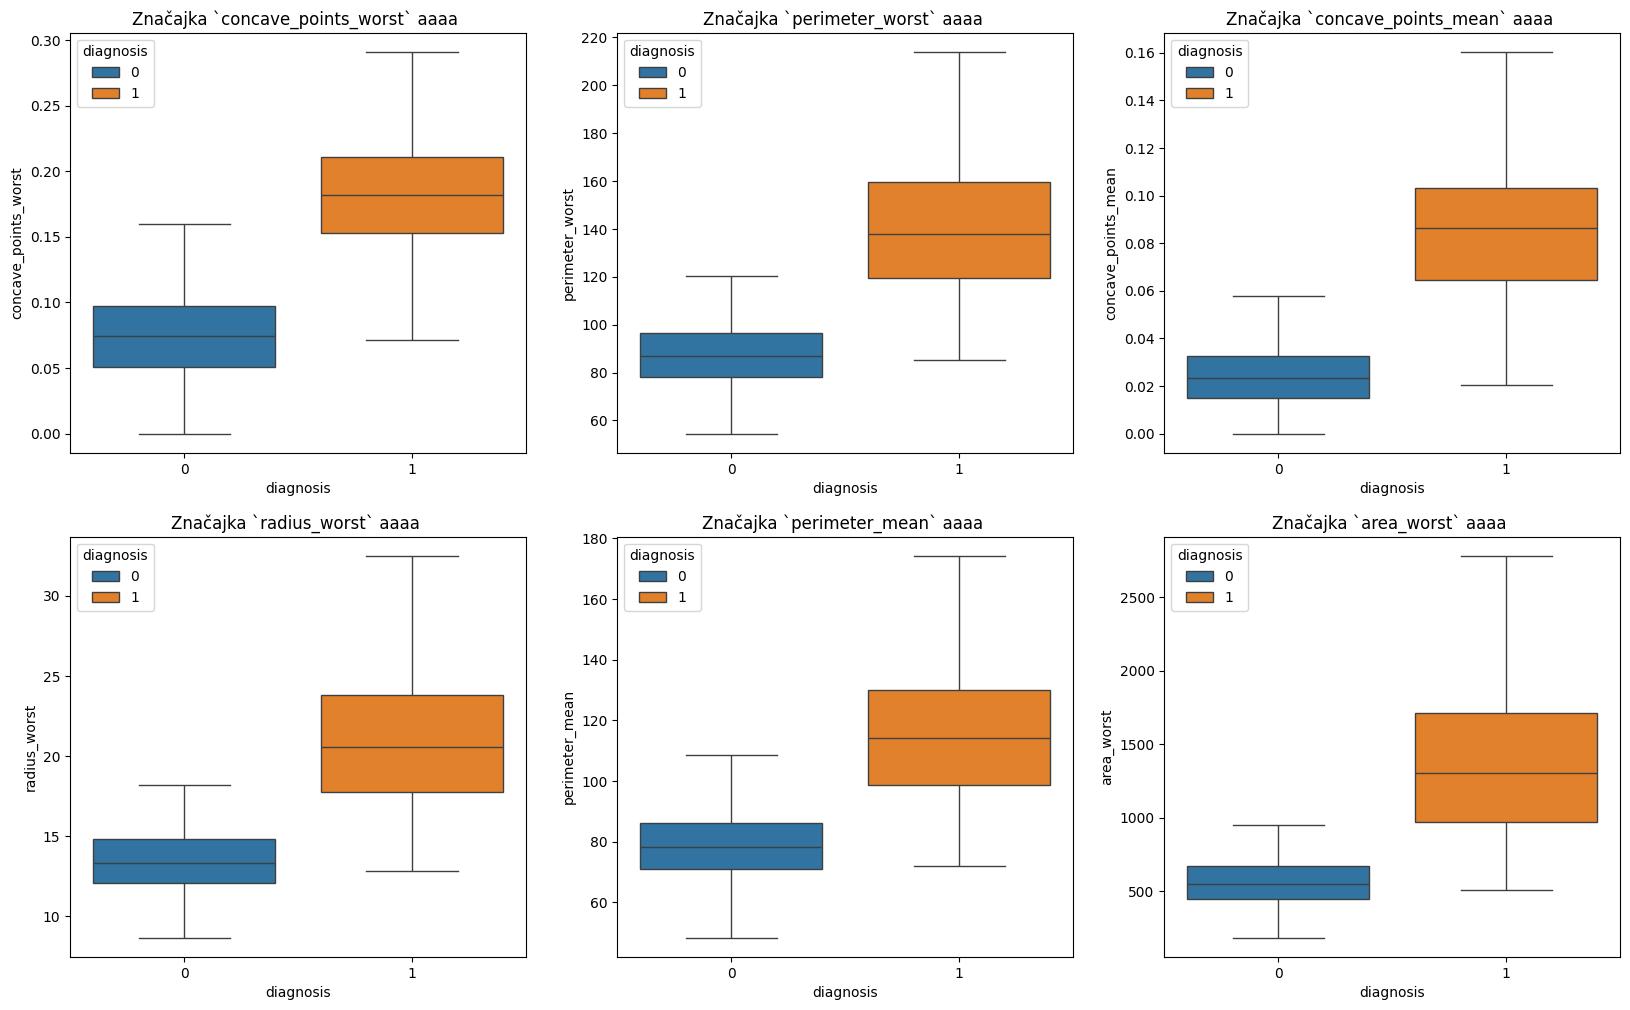

In [ ]:
# 6 najznačajnih značajki za dijagnozu
features = ttest_df[ttest_df['Rang'] <= 6]['Znacajka'].values
variable = 'diagnosis'

rows = math.ceil(len(features)/3)
fig, ax = plt.subplots(2,3,figsize=(20,12))
ax = ax.flatten()
for i,feature in enumerate(features):
    sns.boxplot(x=variable, y=feature, data=df,ax=ax[i],showfliers=False,hue='diagnosis')
    ax[i].set_title(f'Značajka `{feature}` aaaa ')

Gotovi smo s istraživanjem i čišćenjem podataka. Postavit ćemo podatke za
model dijeljenjem podataka u 2 skupa podataka. Prvi skup će biti neovisni skup podataka(X) - onaj sa značajkama i drugi, ciljni skup podataka također poznat kao ovisan skup podataka(Y); koda nas je to stupac 'diagnosis'

In [ ]:
X = df.iloc[:, 1:30].values
Y = df.iloc[:, 0].values

Dijelimo podatke ponovno, ali ovaj put na odnos 3:1; 75% podataka će ići za obuku modela a osatlih(samo) 25% podataka za testiranje modela. Vidimo važnost količine i različitosti podataka. Što više i različitijih podataka imamo naš model je u pravilu bolji.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =
0.25, random_state = 0)

Sklairamo podatke kako bi sve značajke doveli na istu razinu magnitude, koja znači da će značajka/neovisni podaci/(X skup) biti unutar određenog raspona

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Sada napokon možemo krenuti sa korištenjem modelia. Koristit ćemo više različitih modela kako bi utvrdili koju model najbolje odgovara našem tipu podatataka i koji najbolje pogađa. Stvoramo funkciju koja sadrzi puno modela : Logistička regresija, KNC, Klasifikator stabla odluka, Klasifikator slučajnih šuma...) Osnovna ideja je da modeli otkriju ima li pacijent rak ili ne(na temelju ovih podataka) i to naravno uz što veću točnost.

# Treniranje

In [ ]:
def models(X_train,Y_train):
    #Using Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)


    #Using KNeighborsClassifier
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p= 2)
    knn.fit(X_train, Y_train)

    #Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)

    #Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)

    #Using GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

    #Using DecisionTreeClassifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)

    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [ ]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.9906103286384976
[1]K Nearest Neighbor Training Accuracy: 0.9765258215962441
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9882629107981221
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9835680751173709
[4]Gaussian Naive Bayes Training Accuracy: 0.9507042253521126
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9953051643192489


# Testiranje

###### Matrica konfuzije
Prikazujemo matricu konfuzije i točnost modela nad podacima. Matrica konfuzije govori nam koliko pacijenata je svaki model pogrešno/isprano dijagnosticirao. Kod pogrešnih imamo one koji imamu rak ali su diagnosticirani kako da ga nemaju; lažno negativni, i broj pacijenata koji nemaju rak ali su dijagnosticirani kako da imaju; lažano pozitivan. Ispravno diagnosticirani je broj ispravnih dijagnoza, istinitih pozitivnih i istinitih negativnih.
Cilj je naravno maksimizirat broj ispravni a smanjit broj pogrešnih diagnoza, posebice lažno negativnih!

[[86  4]
 [ 4 49]]


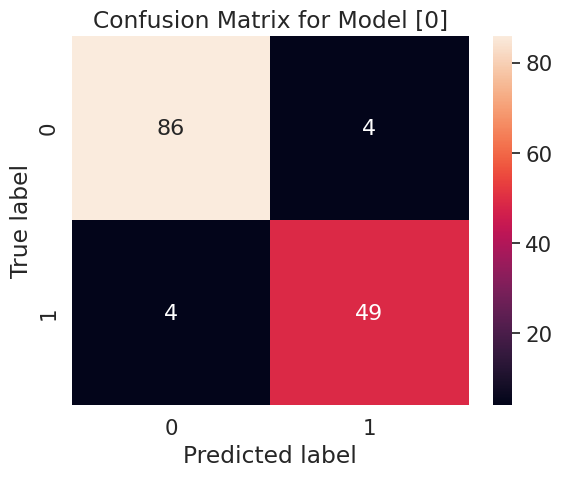

Model[0] Testing Accuracy = "0.9440559440559441!"

[[89  1]
 [ 5 48]]


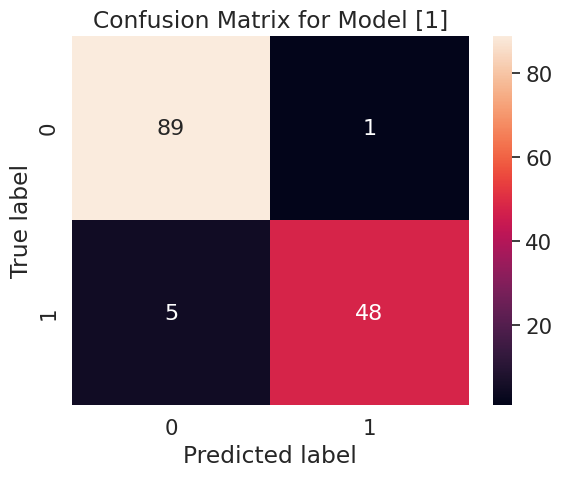

Model[1] Testing Accuracy = "0.958041958041958!"

[[87  3]
 [ 2 51]]


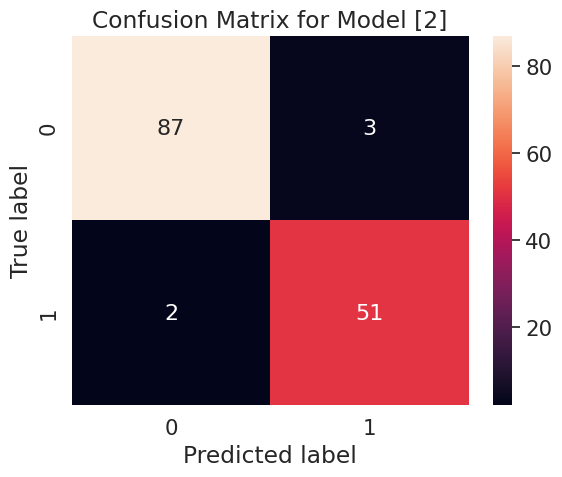

Model[2] Testing Accuracy = "0.965034965034965!"

[[88  2]
 [ 3 50]]


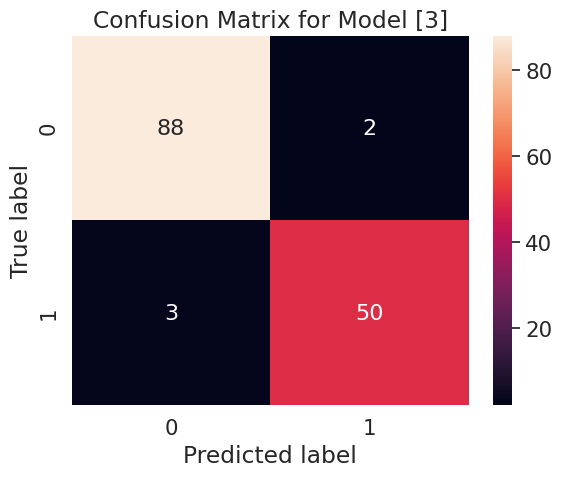

Model[3] Testing Accuracy = "0.965034965034965!"

[[85  5]
 [ 6 47]]


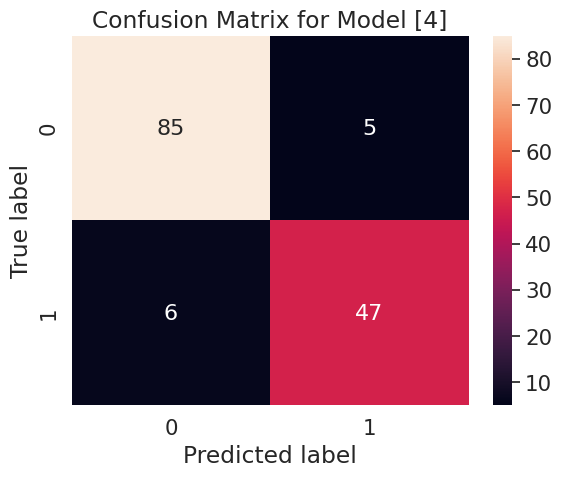

Model[4] Testing Accuracy = "0.9230769230769231!"

[[84  6]
 [ 1 52]]


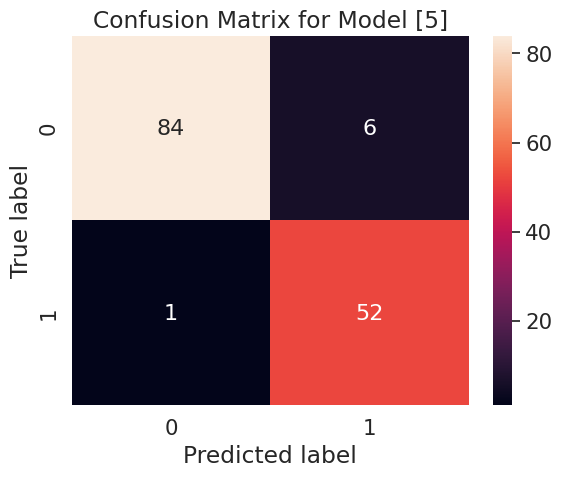

Model[5] Testing Accuracy = "0.951048951048951!"

[[87  3]
 [ 2 51]]


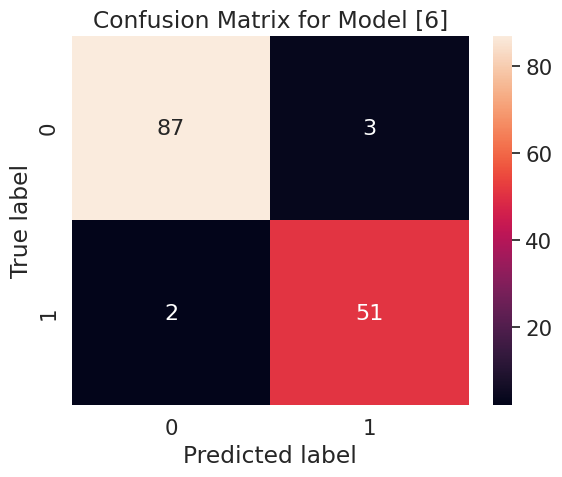

Model[6] Testing Accuracy = "0.965034965034965!"



In [ ]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))

    TN = cm[0][0]   #true negative
    TP = cm[1][1]   #true positive
    FN = cm[1][0]   #false negative
    FP = cm[0][1]   #false positive

    print(cm)



    import seaborn as sn
    import pandas as pd
    import matplotlib.pyplot as plt



    df_cm = pd.DataFrame(cm, range(2), range(2))
    # plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.title('Confusion Matrix for Model [{}]'.format(i))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print('Model[{}] Testing Accuracy = "{}!"'.format(i, (TP + TN) / (TP + TN + FN + FP)))
    print()

Model  0
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

0.9440559440559441



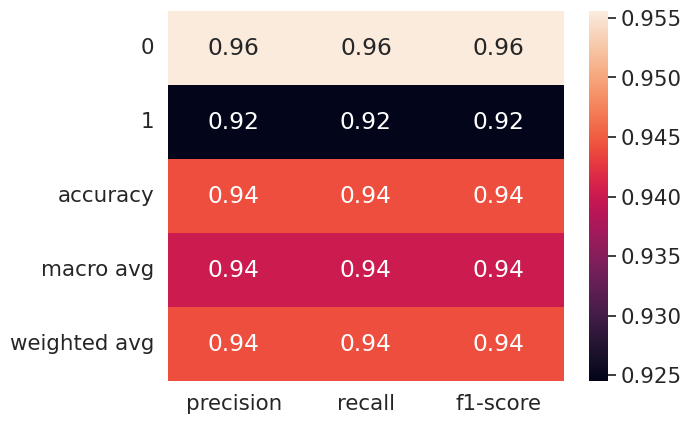

Model  1
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

0.958041958041958



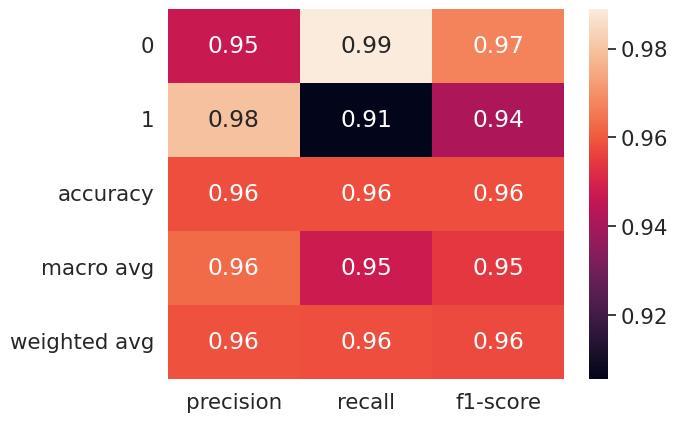

Model  2
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

0.965034965034965



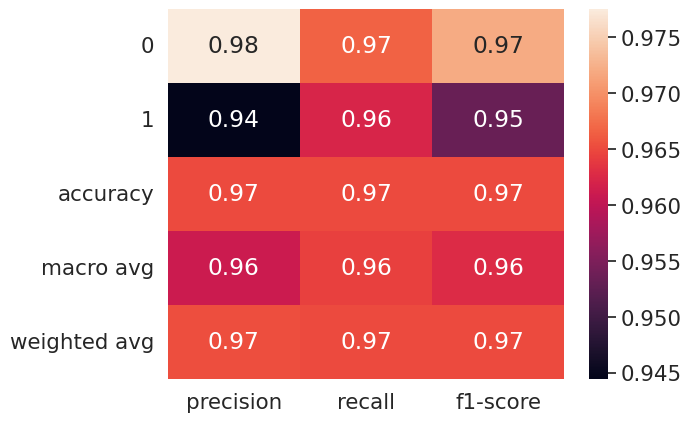

Model  3
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143

0.965034965034965



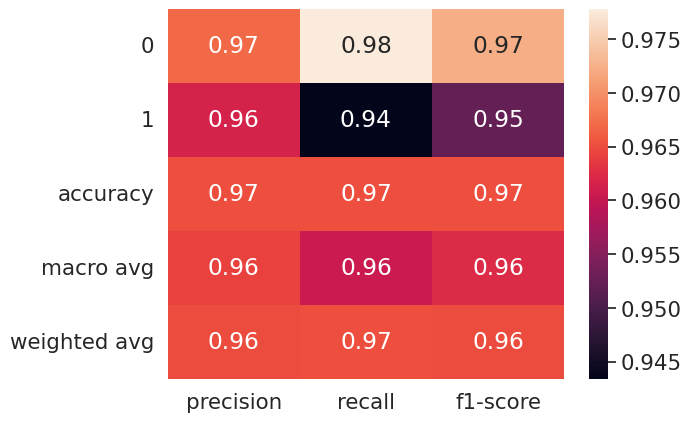

Model  4
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        90
           1       0.90      0.89      0.90        53

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

0.9230769230769231



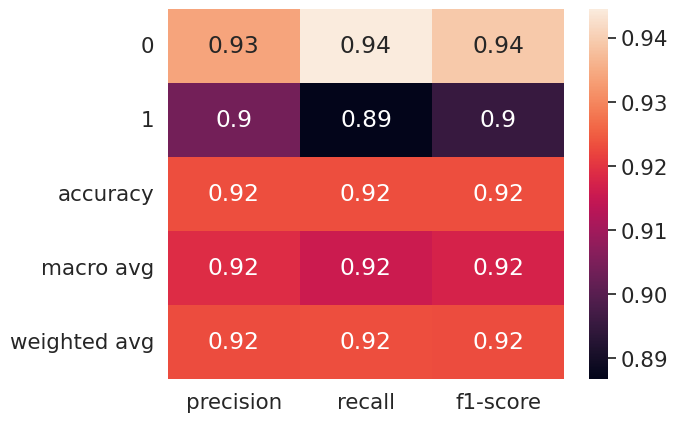

Model  5
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        90
           1       0.90      0.98      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951



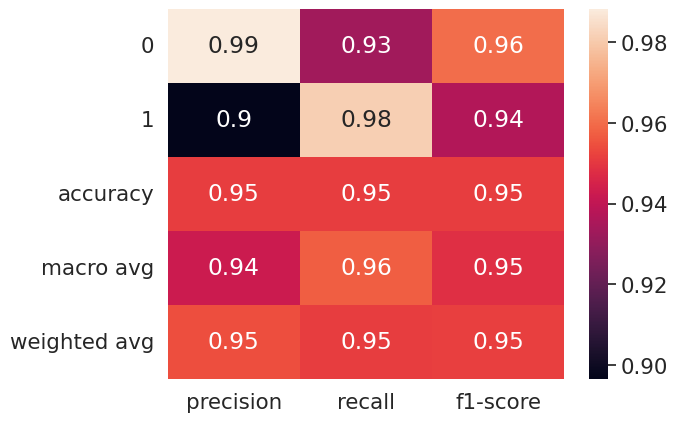

Model  6
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

0.965034965034965



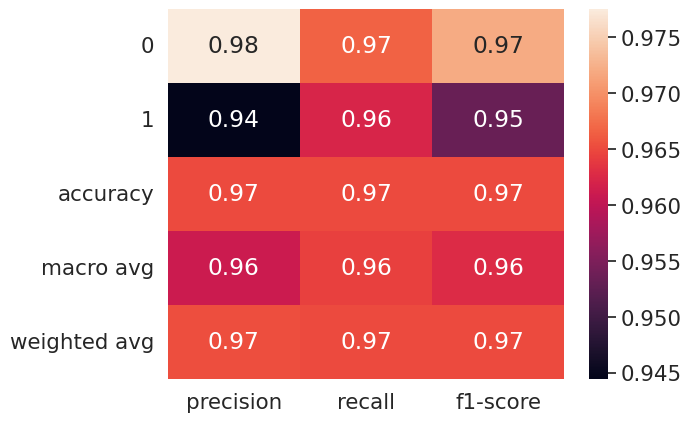

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

for i in range(len(model)):
    print('Model ',i)
    print( classification_report(Y_test, model[i].predict(X_test)) )  #precision, recall, f1-score
    print( accuracy_score(Y_test, model[i].predict(X_test)))  #točnost predviđanja nad testnim podacima
    print()#Print a new line

    target_names = list("01")
    labels = np.arange(2)

    clf_report = classification_report(Y_test,
                                   model[i].predict(X_test),
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)

    # .iloc[:-1, :] to exclude support
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
    plt.show()